# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dunedin
Processing Record 2 of Set 1 | manicore
Processing Record 3 of Set 1 | nova sintra
Processing Record 4 of Set 1 | cooma
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 17 of Set 1 | remire-montjoly
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | vernon
Processing Record 20 of Set 1 | port-aux-franc

Processing Record 40 of Set 4 | agadez
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | sarmiento
Processing Record 43 of Set 4 | chakwama
City not found. Skipping...
Processing Record 44 of Set 4 | fort irwin
Processing Record 45 of Set 4 | pryor
Processing Record 46 of Set 4 | alenquer
Processing Record 47 of Set 4 | port alfred
Processing Record 48 of Set 4 | mcalester
Processing Record 49 of Set 4 | bonito
Processing Record 0 of Set 5 | luganville
Processing Record 1 of Set 5 | ola
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | ouellah
City not found. Skipping...
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | chigorodo
Processing Record 6 of Set 5 | namie
Processing Record 7 of Set 5 | vredendal
Processing Record 8 of Set 5 | kogalym
Processing Record 9 of Set 5 | manokwari
Processing Record 10 of Set 5 | andkhoy
Processing Record 11 of Set 5 | rio grande
Processing Record 12 of Set 5 | lihue
Processing Record 13 

Processing Record 33 of Set 8 | ashland
Processing Record 34 of Set 8 | vuktyl
Processing Record 35 of Set 8 | jabat
Processing Record 36 of Set 8 | flying fish cove
Processing Record 37 of Set 8 | kapuskasing
Processing Record 38 of Set 8 | poronaysk
Processing Record 39 of Set 8 | maquoketa
Processing Record 40 of Set 8 | yakeshi
Processing Record 41 of Set 8 | aykhal
Processing Record 42 of Set 8 | shibetsu
Processing Record 43 of Set 8 | holualoa
Processing Record 44 of Set 8 | afua
Processing Record 45 of Set 8 | jiuquan
Processing Record 46 of Set 8 | cill airne
Processing Record 47 of Set 8 | badiyah
Processing Record 48 of Set 8 | mananjary
Processing Record 49 of Set 8 | mukalla
Processing Record 0 of Set 9 | hohhot
Processing Record 1 of Set 9 | ascope
Processing Record 2 of Set 9 | weno
Processing Record 3 of Set 9 | santa isabel
Processing Record 4 of Set 9 | port blair
Processing Record 5 of Set 9 | kas
Processing Record 6 of Set 9 | kolonia town
Processing Record 7 of Set

Processing Record 19 of Set 12 | kuta
Processing Record 20 of Set 12 | show low
Processing Record 21 of Set 12 | belmonte
Processing Record 22 of Set 12 | gebeit
Processing Record 23 of Set 12 | pachino
Processing Record 24 of Set 12 | san andres
Processing Record 25 of Set 12 | esquel
Processing Record 26 of Set 12 | port glaud
City not found. Skipping...
Processing Record 27 of Set 12 | bo phloi
Processing Record 28 of Set 12 | al burayqah
Processing Record 29 of Set 12 | roma
Processing Record 30 of Set 12 | fauske
Processing Record 31 of Set 12 | harstad
Processing Record 32 of Set 12 | zouerate
Processing Record 33 of Set 12 | harar
Processing Record 34 of Set 12 | hanover
Processing Record 35 of Set 12 | clermont
Processing Record 36 of Set 12 | siwa oasis
Processing Record 37 of Set 12 | limassol
Processing Record 38 of Set 12 | pangody
Processing Record 39 of Set 12 | ha'il
Processing Record 40 of Set 12 | sihanoukville
-----------------------------
Data Retrieval Complete     

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dunedin,-45.8742,170.5036,12.11,57,89,0.45,NZ,1706983257
1,manicore,-5.8092,-61.3003,30.17,75,86,1.28,BR,1706983257
2,nova sintra,14.8667,-24.7167,21.26,69,60,6.02,CV,1706983257
3,cooma,-36.2333,149.1333,14.31,63,77,0.87,AU,1706982665
4,ribeira grande,38.5167,-28.7000,18.22,77,20,8.05,PT,1706983258


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dunedin,-45.8742,170.5036,12.11,57,89,0.45,NZ,1706983257
1,manicore,-5.8092,-61.3003,30.17,75,86,1.28,BR,1706983257
2,nova sintra,14.8667,-24.7167,21.26,69,60,6.02,CV,1706983257
3,cooma,-36.2333,149.1333,14.31,63,77,0.87,AU,1706982665
4,ribeira grande,38.5167,-28.7000,18.22,77,20,8.05,PT,1706983258


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

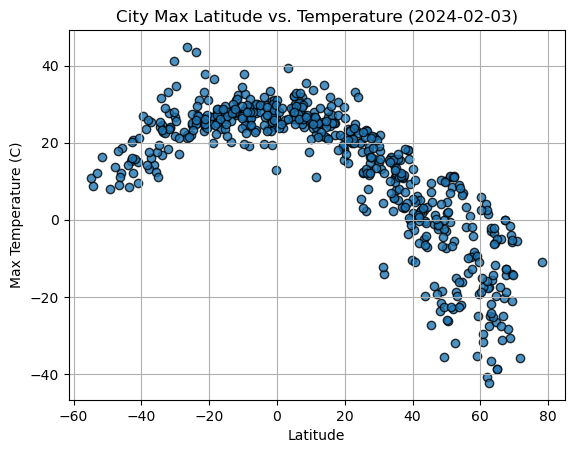

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

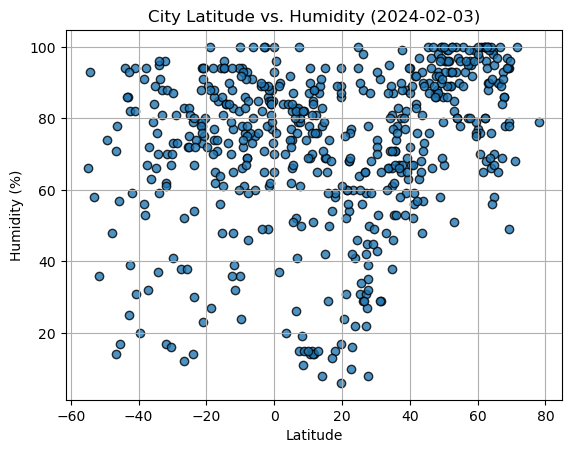

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

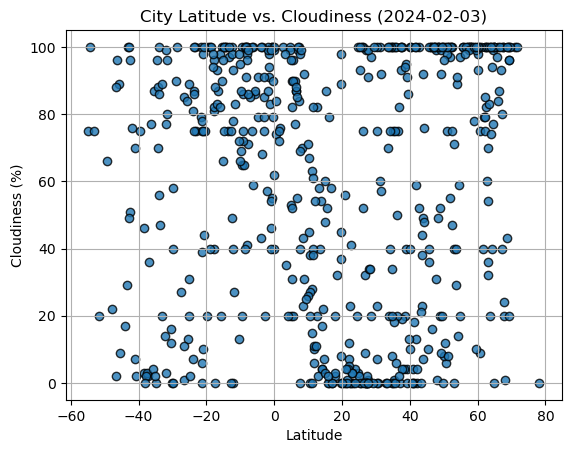

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

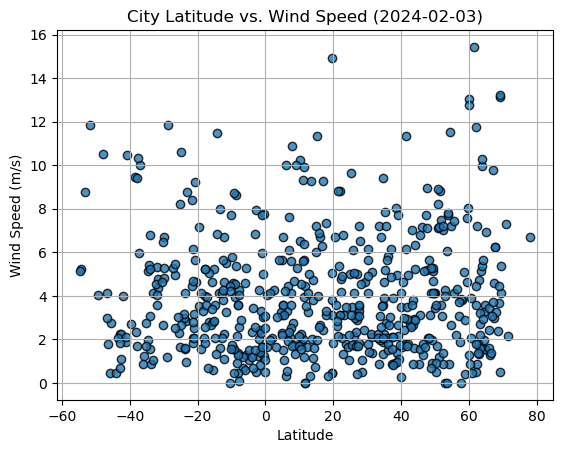

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nova sintra,14.8667,-24.7167,21.26,69,60,6.02,CV,1706983257
4,ribeira grande,38.5167,-28.7000,18.22,77,20,8.05,PT,1706983258
10,iskateley,67.6803,53.1512,-12.77,86,20,6.26,RU,1706983074
11,mount pearl,47.5166,-52.7813,-1.75,87,100,7.72,CA,1706983259
13,remire-montjoly,4.9167,-52.2667,32.02,62,20,5.66,GF,1706983260


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dunedin,-45.8742,170.5036,12.11,57,89,0.45,NZ,1706983257
1,manicore,-5.8092,-61.3003,30.17,75,86,1.28,BR,1706983257
3,cooma,-36.2333,149.1333,14.31,63,77,0.87,AU,1706982665
5,blackmans bay,-43.0167,147.3167,15.29,86,100,2.24,AU,1706983258
6,port elizabeth,-33.9180,25.5701,24.50,95,100,3.09,ZA,1706983258


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7448464339655204


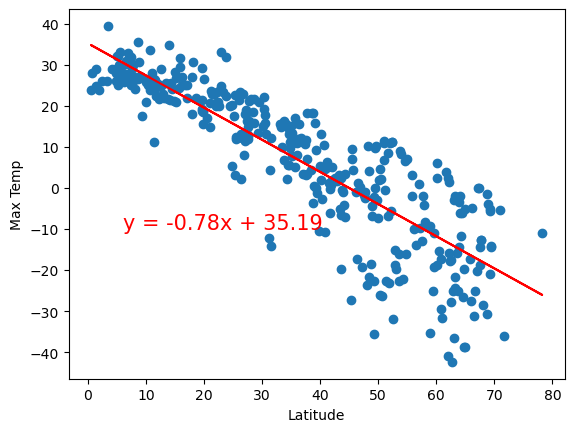

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

The r-value is: 0.32349209114390226


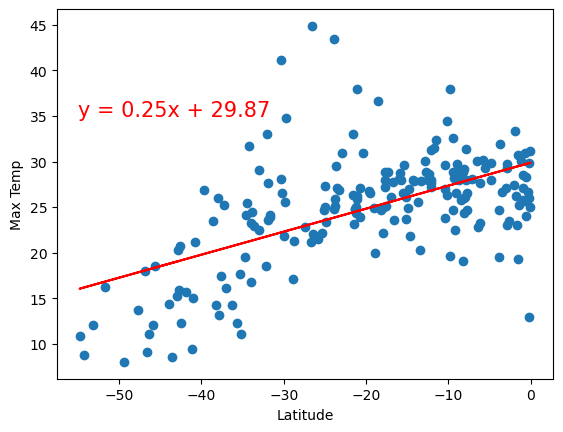

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** The high `r` value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18884729794294058


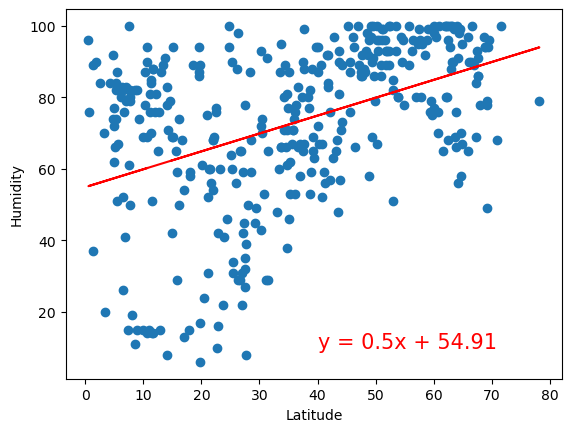

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.0636130593338521


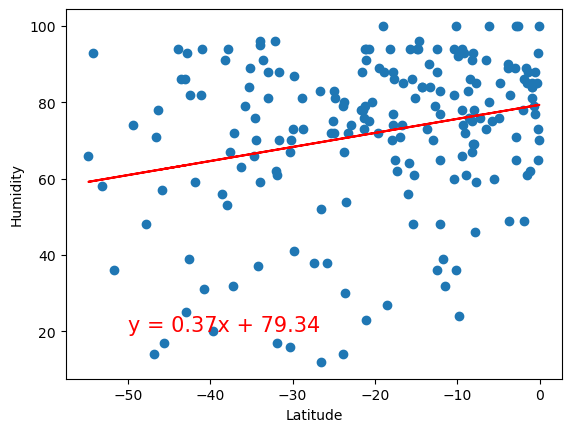

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** The low `r` values indicate a weak to no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0714108107882262


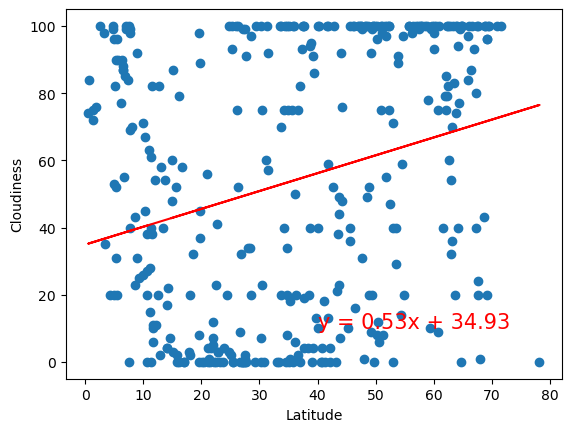

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.1082514991742267


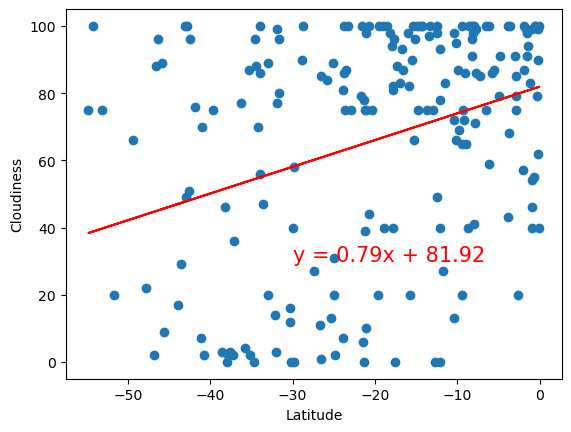

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** The low `r` values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005704631800356132


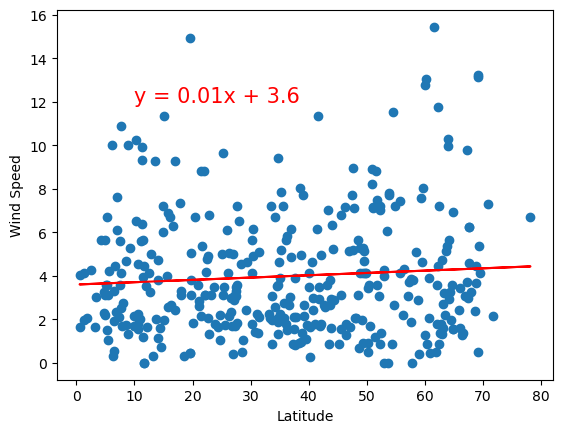

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.04057499216042037


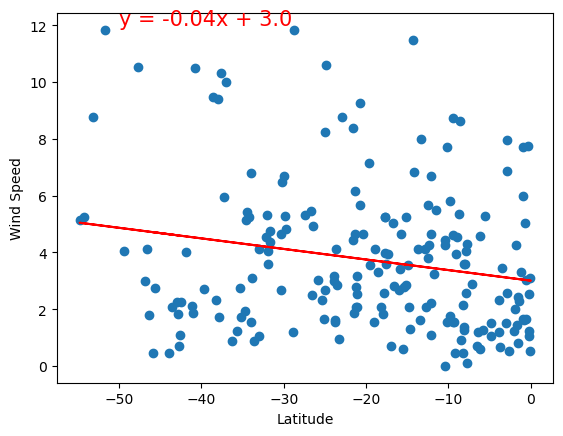

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** The low `r` values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.